# <u><center> Fear, Greed, and Profit: A Data Analytics Approach to Market Sentiment

## <center> Assignment submission by Shyam SR

## Understanding the data, column and its description is important for analysis : 

### Historical_data.csv content - Features and their description is as follows :
### Here the time is recorded as an epoch timestamp (i.e - An epoch timestamp is a way of representing a specific moment in time as a single number — the number of seconds (or milliseconds) that have passed since a fixed starting point. 
### Eg : 1733800000 - Its the number of seconds after Jan 1, 1970 UTC.

Column Name            | Description                                                                        |
| -------------------- | ---------------------------------------------------------------------------------- |
| **Account**          | Unique identifier for the trading account executing the trades.                    |
| **Coin**             | The cryptocurrency or market symbol being traded.                                  |
| **Execution Price**  | The price at which the trade was executed.                                         |
| **Size Tokens**      | Quantity of tokens involved in the trade.                                          |
| **Size USD**         | Total trade size in USD equivalent.                                                |
| **Side**             | Whether the trade was a BUY or SELL order.                                         |
| **Timestamp IST**    | Date and time of the trade in IST (Indian Standard Time).                          |
| **Start Position**   | The account's position size before this trade.                                     |
| **Direction**        | Trade direction relative to position (e.g., Buy or Sell).                          |
| **Closed PnL**       | Profit or Loss realized when a position is closed.                                 |
| **Transaction Hash** | Unique blockchain transaction identifier.                                          |
| **Order ID**         | Unique identifier for the specific order.                                          |
| **Crossed**          | Boolean indicating if the order was marketable immediately against the order book. |
| **Fee**              | Trading fee paid for this transaction in USD equivalent.                           |
| **Trade ID**         | Unique identifier for the trade execution.                                         |
| **Timestamp**        | Epoch timestamp of when the trade was recorded.                                    |


## fear_greed_index.csv features (column values and its description) : 
| Column Name        | Description                                                                                                |
| ------------------ | ---------------------------------------------------------------------------------------------------------- |
| **timestamp**      | Unix epoch timestamp (in seconds) indicating when the sentiment was recorded.                              |
| **value**          | Numerical sentiment score (0 = extreme fear, 100 = extreme greed).                                         |
| **classification** | Sentiment category based on the value (e.g., "Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"). |
| **date**           | Calendar date in `YYYY-MM-DD` format corresponding to the timestamp.                                       |


## Loading libraries, data and data analysis

In [5]:
# Import all basic required libraries 

import os, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, warnings
from scipy import stats
warnings.filterwarnings('ignore')


In [6]:
# Load the data into pandas 

fg = pd.read_csv('fear_greed_index.csv')           # columns: timestamp, value, classification, date
tr = pd.read_csv('historical_data.csv')            # key cols used below



In [7]:
# Check the data uploaded with .head() the first 5 records 

fg.head()



,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
# Checking the last part for the other data using .tail() method

tr.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [9]:
# Checking the data types and null values 

fg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
# With .info() method - we can easily observe all null values, features, their datatypes and total count of values as well

tr.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

## Data Cleaning

In [12]:
# From fg data, the date field is of data-type = object - Need to convert the proper date type with pd.to_datetime() method

fg["date"] = pd.to_datetime(fg["date"], errors="coerce") # Here coerce is given to convert errors to NaT 



In [13]:
# Removes any null values in date 

fg = fg.dropna(subset=["date"]) 



In [14]:
# Similarly need to modify the Timestamp in tr properly in IST format 

# "Timestamp IST" format like "02-12-2024 22:50"
tr["Timestamp IST"] = pd.to_datetime(tr["Timestamp IST"], format="%d-%m-%Y %H:%M", errors="coerce")


In [15]:
# Keep only rows with valid timestamps and numeric PnL/fees/volume

num_cols = ["Closed PnL", "Size USD", "Fee"]
for c in num_cols:
    # coerce to numeric in case of strings
    tr[c]=pd.to_numeric(tr[c],errors ='coerce')



In [16]:
# Remove all null values in Timestamp IST 

tr = tr.dropna(subset=["Timestamp IST"])



In [17]:
'''
Fear–Greed index is one value per day (no time part) but we need to make the time part as 00.00.00 - so use .normalize() 
so all trades on the same day share the exact same datetime value (YYYY-MM-DD 00:00:00), 
making it easy to group by day and join with the sentiment data
'''

tr["date"] = tr["Timestamp IST"].dt.normalize() 


In [18]:
# This step is NOT NECESSARY BUT IMPLEMENTING AS A GOOD PRACTISE
# Observed that the "Side" feature contains text values and it is a better practise to standardize the value 
# used str.upper() to capitalize and str.strip() to prevent space in the value to use this data for further analysis. 

if "Side" in tr.columns: 
    tr["Side"] = tr["Side"].astype(str).str.upper().str.strip()




In [19]:
# Similarly for the "Direction" feature - implementing the same logic as above

if "Direction" in tr.columns:
    tr["Direction"] = tr["Direction"].astype(str).str.upper().str.strip()




## Feature Engineering

#### There is a necessity to create new features for the trade analysis especially based on features - Closed PnL, Size USD, Fee, etc.
#### Using statistics formula of mean, median in some important features could help in analysis.

In [22]:
# To know whether each trade is profitable or NOT - Need to analyze "Closed PnL" feature
# From this PnL (Profit Or Loss) - we can define a new feature to check for Profit or Loss
# Define a new feature "is_win" in the "tr" dataset

tr["is_win"] = (tr["Closed PnL"] > 0).astype(int)


In [23]:
# To perform this analysis - there is a necessity to have many new features to be defined by Grouping the data by "date".
# Create a new DataFrame "daily" to analyze daily trade of BUY or SELL. 
# and create new features with mean, median on features - Closed PnL, is_win, Size USD, Fee, Side as defined below. 

daily = tr.groupby("date").agg(
    n_trades=("Closed PnL", "size"),             # total number of trades that day
    win_rate=("is_win", "mean"),                 # % of trades profitable (1 = win, 0 = loss)
    sum_pnl=("Closed PnL", "sum"),                # total profit/loss for the day
    avg_pnl=("Closed PnL", "mean"),               # average profit/loss per trade
    median_pnl=("Closed PnL", "median"),          # middle profit/loss value
    std_pnl=("Closed PnL", "std"),                 # volatility of daily PnL
    total_volume=("Size USD", "sum"),             # total USD traded that day
    total_fees=("Fee", "sum"),                     # total fees paid that day
    buys=("Side", lambda s: (s == "BUY").sum()),  # number of BUY trades
    sells=("Side", lambda s: (s == "SELL").sum()),# number of SELL trades
).reset_index() # After a group by operation - it is advisable to use .reset_index() else cannot directly access with daily["date"]



In [24]:
# For aggregate function to work, there should be atleast 2 values, assuming if there are no 2 values,then it would return NaN
# Check for any Nan values in daily 

daily.isna().sum()



date            0
n_trades        0
win_rate        0
sum_pnl         0
avg_pnl         0
median_pnl      0
std_pnl         6
total_volume    0
total_fees      0
buys            0
sells           0
dtype: int64

In [25]:
# For std_pnl: 0 means “no variation” if only one trade. Using fillna() method to replace Nan with 0.0 

daily["std_pnl"] = daily["std_pnl"].fillna(0.0)



In [26]:
# Need to check for any Fees - for the trade done 

daily['total_fees'].sum()


245857.7205657308

In [27]:
'''
Some Trading platforms dont deduct fees for the trade done
To estimate the correct Profit or Loss from "Closed PnL" for the particular trade done
Need to verify whether fees is deducted from the Closed Pnl 
'''
tr_example = tr.iloc[0]  # or filter for a specific Trade ID
print(tr_example["Closed PnL"], tr_example["Fee"])
print(tr_example["Closed PnL"] + tr_example["Fee"])


0.0 0.34540448
0.34540448


#### Thus it is evident that Fee is already deducted for the trade

In [29]:
# Assign the sum_pnl as net_pnl (a new feature created for checking the net profit or loss for the trade

daily["net_pnl"] = daily["sum_pnl"]   # already net


In [30]:
# Need to analyze the 2 DataFrame for Trade and Market Sentiment
# Each day’s trading performance is linked to that day’s market sentiment.
# Taking a copy of "fg - dataset" using .copy() method with sentiment related features - date, value and classification to avoid analysis issues 

fg_small = fg[["date", "value", "classification"]].copy()


In [31]:
# Merge this fg_small with the daily dataframe using date as common column  using pd.merge()

merged = pd.merge(daily, fg_small, on="date", how="inner").sort_values("date")


In [32]:
# Checking the merged data 

merged.head()



,date,n_trades,win_rate,sum_pnl,avg_pnl,median_pnl,std_pnl,total_volume,total_fees,buys,sells,net_pnl,value,classification
0,2023-05-01,3,0.000000,0.000000,0.000000,0.000000,0.000000,477.00,0.000000,3,0,0.000000,63,Greed
1,2023-12-05,9,0.000000,0.000000,0.000000,0.000000,0.000000,50005.83,12.501455,7,2,0.000000,75,Extreme Greed
2,2023-12-14,11,0.363636,-205.434737,-18.675885,0.000000,179.663534,113203.35,28.300831,5,6,-205.434737,72,Greed
3,2023-12-15,2,0.000000,-24.632034,-12.316017,-12.316017,4.474304,10609.95,2.652489,2,0,-24.632034,70,Greed
4,2023-12-16,3,0.000000,0.000000,0.000000,0.000000,0.000000,15348.77,3.837189,3,0,0.000000,67,Greed


In [33]:
# Need to check the correlation for all these values 

# Taking the columns to check correlations from "merged"
corr_cols = ["value", "sum_pnl", "net_pnl", "avg_pnl", "win_rate", "total_volume", "total_fees", "n_trades"]

# Using .corr() method to compute correlation
corr = merged[corr_cols].corr()



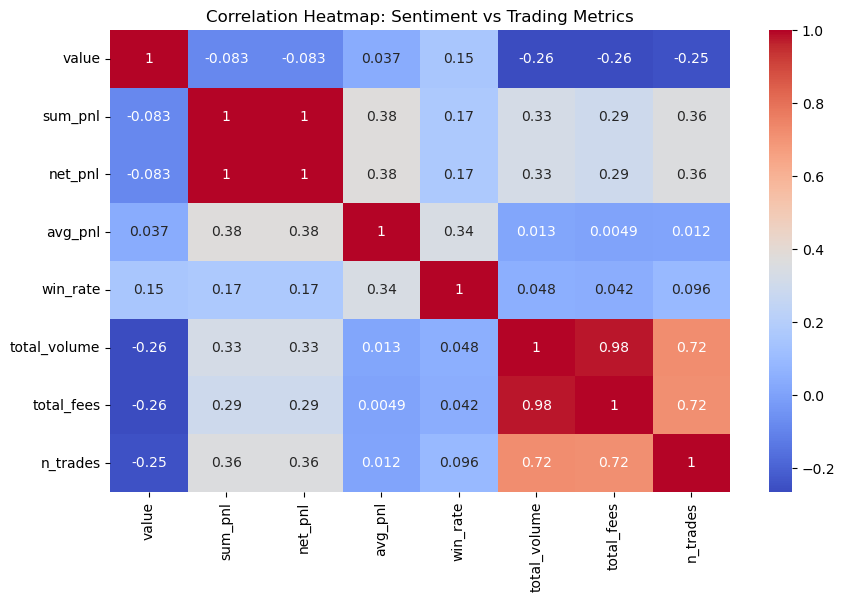

In [34]:
# Using a Heatmap() to analyze the correlation graphically 

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Sentiment vs Trading Metrics")
plt.show()



### From the heatmap, the following can be understood : 
- <b> Trading activity (volume, number of trades, fees) tends to be lower when market sentiment is higher (more Greed).

- <b> PnL and win rate aren’t strongly tied to sentiment score — meaning traders might be performing similarly in both fear and greed markets, at least in this dataset.

- <b> Fee control could be an important lever: since total fees are so tightly tied to trade count and volume, cutting unprofitable high-frequency trades could directly improve net results.

#### <u> Grouping "merge" by market sentiment with statistics to obtain actionable insights for building sentiment-based trading strategies

- Extreme Greed            : Highest average daily net PnL and win rate.

- Extreme Fear             : Lower profits but higher trade volume.

- Neutral                  : Low volatility, low opportunity.

- Performance benchmarking : See which sentiment conditions (e.g., “Extreme Fear” vs “Extreme Greed”) tend to be more profitable.

- Strategy insight         : Identify if your strategy works better in certain market moods.

- Risk evaluation          : Compare win rates and PnL volatility between regimes.

- Prioritization           : Focus trading efforts during the most favorable sentiment phases.

  

In [38]:
# To Compare performance across different sentiment - grouping "merge" by market sentiment
# Along with summary statistics for each category using mean and median for each day using nunique()

by_class = (
    merged.groupby("classification")      # Group by sentiment category (Extreme Fear, Fear, Neutral, Greed, Extreme Greed)
    .agg(
        days=("date", "nunique"),          # How many unique days in that category
        mean_value=("value", "mean"),      # Average Fear–Greed score in that category
        mean_sum_pnl=("sum_pnl", "mean"),  # Average total daily PnL for that category
        mean_net_pnl=("net_pnl", "mean"),  # Average net PnL for that category
        mean_avg_pnl=("avg_pnl", "mean"),  # Average per-trade PnL for that category
        mean_win_rate=("win_rate", "mean"),# Average win rate in that category
        mean_volume=("total_volume", "mean"), # Average trade volume per day in that category
        median_sum_pnl=("sum_pnl", "median"), # Median daily PnL in that category
    )
    .sort_values("mean_net_pnl", ascending=False) # Sort from most profitable to least
)




In [39]:
# Check the by_class dataframe using .head() 

by_class.head()



,days,mean_value,mean_sum_pnl,mean_net_pnl,mean_avg_pnl,mean_win_rate,mean_volume,median_sum_pnl
classification,,,,,,,,
Extreme Fear,14,19.285714,52793.589178,52793.589178,38.433903,0.327341,8.177447e+06,22561.739636
Fear,91,32.263736,36891.818040,36891.818040,31.276567,0.329112,5.311261e+06,1412.314654
Extreme Greed,114,79.254386,23817.292199,23817.292199,56.736108,0.467424,1.091800e+06,3127.536297
Neutral,67,49.791045,19297.323516,19297.323516,63.820699,0.331886,2.690180e+06,1818.573295
Greed,193,68.336788,11140.566181,11140.566181,39.412175,0.335986,1.495246e+06,678.475928


In [40]:
# Group by sentiment classification and compute mean net_pnl

sentiment_summary = merged.groupby("classification")["net_pnl"].mean().reset_index()

# Sort for better visual ordering (highest to lowest)

sentiment_summary = sentiment_summary.sort_values("net_pnl", ascending=False)



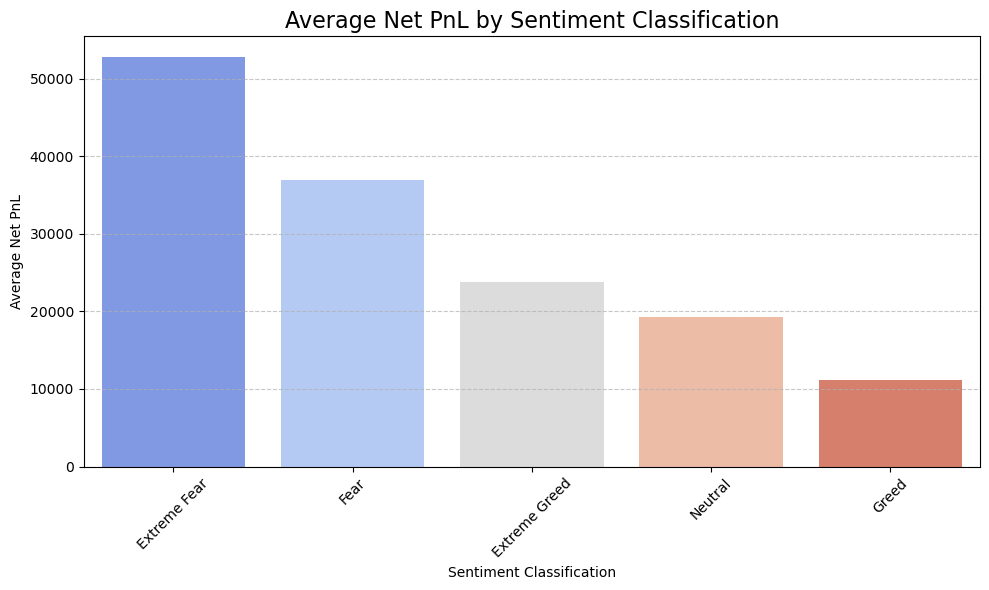

In [41]:
# Bar plot for visual comparison

plt.figure(figsize=(10, 6))
sns.barplot(
    data=sentiment_summary,
    x="classification",
    y="net_pnl",
    palette="coolwarm"
)

# Add labels and title

plt.title("Average Net PnL by Sentiment Classification", fontsize=16)
plt.xlabel("Sentiment Classification")
plt.ylabel("Average Net PnL")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()



#### Kruskal–Wallis test is the non-parametric equivalent of ANOVA.

- It’s used when dataset has more than two groups in this case = "Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"

- We can’t assume a normal distribution or equal variances and need to check if at least one group’s median is different.

- This gives an output: <b> H statistic </b> — measures the difference between group ranks and <b> p value </b> — if < 0.05, at least one group differs significantly.

In [43]:
# Kruskal–Wallis across all classes (non-parametric)

classes = merged["classification"].dropna().unique()
groups = [merged.loc[merged["classification"] == c, "net_pnl"].dropna() for c in classes]
if all(len(g) > 1 for g in groups) and len(groups) >= 2:
    H, p_kw = stats.kruskal(*groups)
    print(f"Kruskal–Wallis across classes (net_pnl): H={H:.3f}, p={p_kw:.4f}")
else:
    print("Not enough data per class for Kruskal–Wallis.")



Kruskal–Wallis across classes (net_pnl): H=20.058, p=0.0005



#### <u> <center> Kruskal-Wallis result explaination : 
#### H statistic = 20.058 - is the rank-based test statistic — larger values generally mean greater differences between groups.
#### The null hypothesis = “All sentiment categories have the same median net PnL”.
#### p-value = 0.0005 -  below 0.05 (typical significance threshold) - strong evidence to reject the null hypothesis - Thus, at least one sentiment category has a different median daily profit.




 ## 

In [46]:
# Since the trade is done on a daily basis - Need to check for LEAD and LAG 
# Does today's sentiment predict tomorrow's performance, or vice versa?
# Lead: shift sentiment forward (today's sentiment aligned with tomorrow's PnL)


merged = merged.sort_values("date").reset_index(drop=True) # sort in ascending with new index value discarding old index order
merged["value_lead1"] = merged["value"].shift(0)               # today
merged["value_lead1_next_day_pnl"] = merged["net_pnl"].shift(-1)  # tomorrow pnl

# To get correlation value between today’s market sentiment score and tomorrow’s net profit/loss

lead_corr = merged[["value_lead1", "value_lead1_next_day_pnl"]].corr().iloc[0, 1] # iloc[] returns the corr value from matrix
print(f"\nLead-1 correlation (today sentiment vs. tomorrow net_pnl): {lead_corr:.4f}")

# Lag: yesterday's sentiment vs today's performance

merged["value_lag1"] = merged["value"].shift(1)
lag_corr = merged[["value_lag1", "net_pnl"]].corr().iloc[0, 1]
print(f"Lag-1 correlation (yesterday sentiment vs. today net_pnl): {lag_corr:.4f}\n")




Lead-1 correlation (today sentiment vs. tomorrow net_pnl): -0.1078
Lag-1 correlation (yesterday sentiment vs. today net_pnl): -0.1078



#### There is a Negative correlation between today's sentiment Vs tomorrow net_pnl indicating HIGH TODAY SCORE - LOW PnL TOMORROW.

- Positive value : Higher sentiment scores today are associated with higher net PnL tomorrow.

- <b> Negative value : Higher sentiment scores today are associated with lower net PnL tomorrow.

- Near zero : No strong relationship between today’s sentiment and tomorrow’s PnL.

In [48]:
# Top and bottom analysis 

top5 = merged.nlargest(5, "net_pnl")[["date", "classification", "value", "n_trades", "total_volume", "net_pnl"]]
bot5 = merged.nsmallest(5, "net_pnl")[["date", "classification", "value", "n_trades", "total_volume", "net_pnl"]]
print("Top 5 net PnL days:\n", top5.to_string(index=False), "\n")
print("Bottom 5 net PnL days:\n", bot5.to_string(index=False), "\n")



Top 5 net PnL days:
       date classification  value  n_trades  total_volume       net_pnl
2025-03-03           Fear     33      1482    8244590.38 616413.032233
2024-12-12  Extreme Greed     83      1932    4557189.87 599151.795008
2025-02-04          Greed     72      2512   15678409.27 416876.888120
2025-04-12           Fear     43      2109   55914617.49 410419.694533
2024-12-22          Greed     73       774    3087320.22 352197.163973 

Bottom 5 net PnL days:
       date classification  value  n_trades  total_volume        net_pnl
2025-04-23          Greed     72      6159   30682443.79 -419020.225731
2024-11-28  Extreme Greed     77       332    1894225.15 -127075.399585
2024-08-04           Fear     34       127    1207744.07 -122672.000883
2024-12-06          Greed     72       403    3471019.22  -92624.643895
2025-03-11   Extreme Fear     24      3286   14016952.09  -76880.729036 



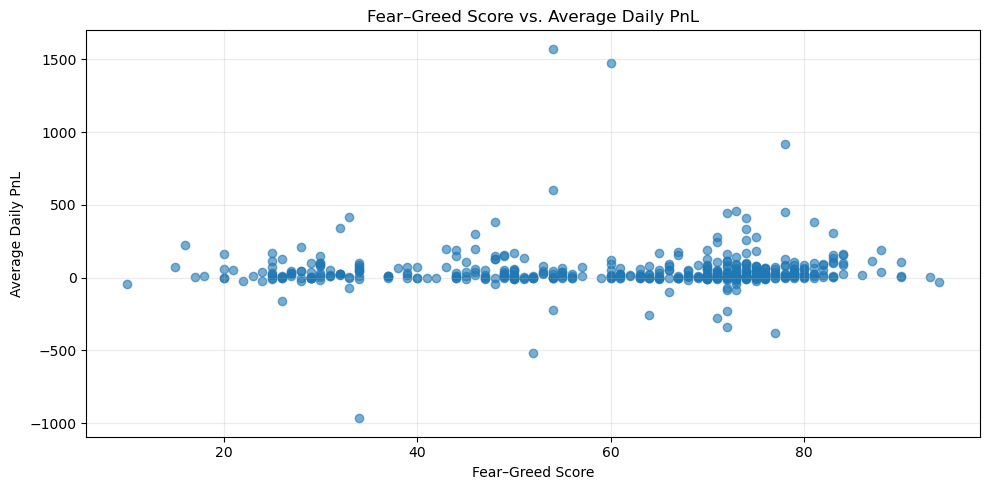

In [49]:
# Fear–Greed Score vs. Average Daily PnL Using Scatter plot

plt.figure(figsize=(10, 5))
plt.scatter(merged["value"], merged["avg_pnl"], alpha=0.6)

plt.title("Fear–Greed Score vs. Average Daily PnL")
plt.xlabel("Fear–Greed Score")
plt.ylabel("Average Daily PnL")
plt.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()

### From the graph, the following can be inferred : 
- No Strong Linear Relationship
- Extreme Fear & Extreme Greed Outliers
- Heavy Concentration Around Zero PnL
- Market sentiment alone is not a reliable predictor of profitability in this dataset.
- Extreme sentiment days may bring bigger moves, but also higher risk.
- A combined model using other factors (volume, win rate, trade size) might give better predictive power than using Fear–Greed alone.
  

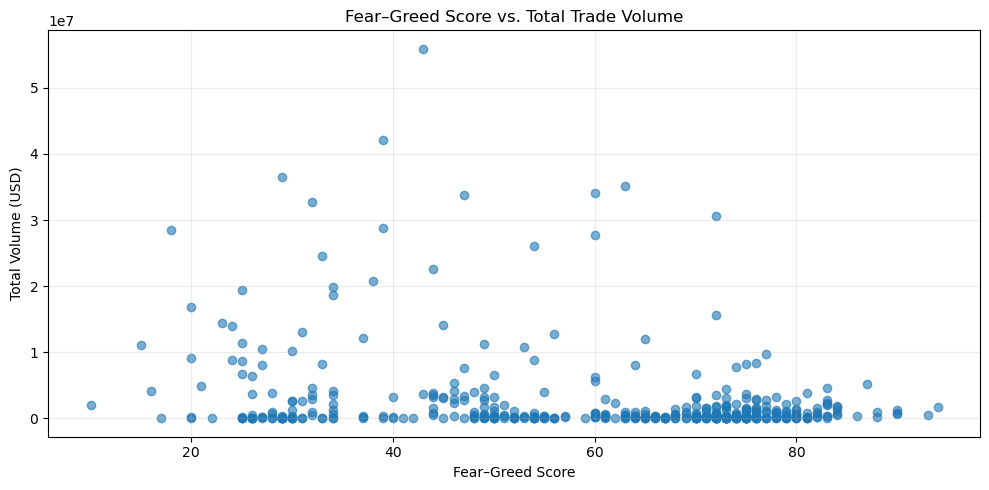

In [51]:
# Scatter plot for Fear–Greed Score vs. Total Trade Volume

plt.figure(figsize=(10, 5))
plt.scatter(merged["value"], merged["total_volume"], alpha=0.6)

plt.title("Fear–Greed Score vs. Total Trade Volume")
plt.xlabel("Fear–Greed Score")
plt.ylabel("Total Volume (USD)")
plt.grid(True, alpha=0.25)

plt.tight_layout()
plt.show()



### From the graph, it can be inferred that: 
- There are No Strong Linear Relationship.
- Clustering Near Lower Volumes (i.e - majority of points are close to the bottom axis).
- big trades can happen in both fearful and greedy markets.

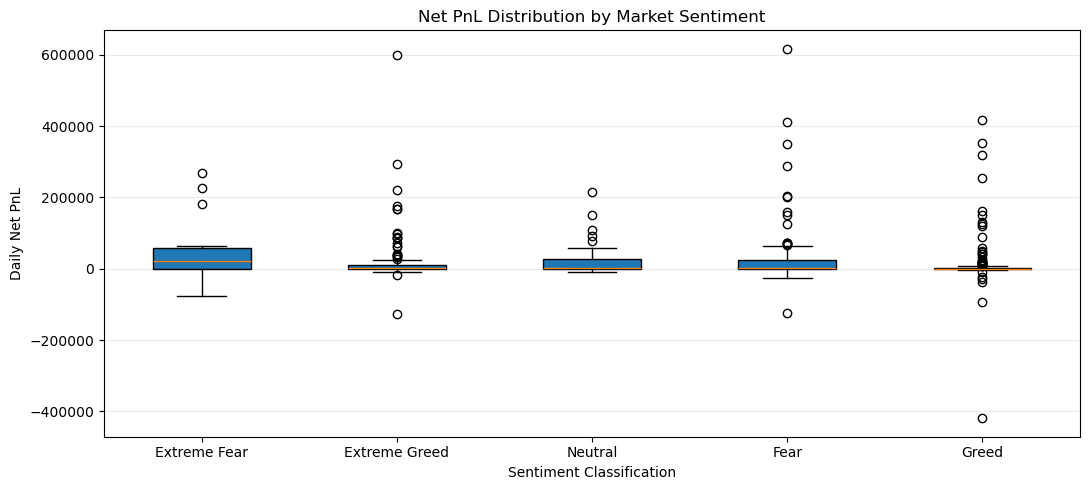

In [53]:
# Boxplot of daily net PnL by classification (sorted by median net_pnl)


order = (
    merged.groupby("classification")["net_pnl"]
    .median()
    .sort_values(ascending=False)
    .index.tolist()
)

# Matplotlib "manual" boxplot by class

class_data = [merged.loc[merged["classification"] == c, "net_pnl"].dropna() for c in order]

plt.figure(figsize=(11, 5))
bp = plt.boxplot(class_data, 
                 labels=order, 
                 showfliers=True, 
                 patch_artist=True)

plt.title("Net PnL Distribution by Market Sentiment")
plt.xlabel("Sentiment Classification")
plt.ylabel("Daily Net PnL")
plt.grid(True, axis="y", alpha=0.25)

plt.tight_layout()
plt.show()


### From this box plot, this indicates : 
- The height of the boxes and whiskers is greatest for Extreme Fear and Extreme Greed, indicating higher volatility in those conditions.
- Extreme sentiment days (fear or greed) tend to produce higher volatility and risk, with both big gains and big losses possible.
- Neutral sentiment days are more stable but may offer fewer large profit opportunities.
- Extreme Fear might be slightly more favorable for positive net PnL compared to Extreme Greed, potentially indicating contrarian opportunities.
- Greed & Extreme Greed: Show many extreme outliers (both positive and negative), but the median PnL seems closer to zero.

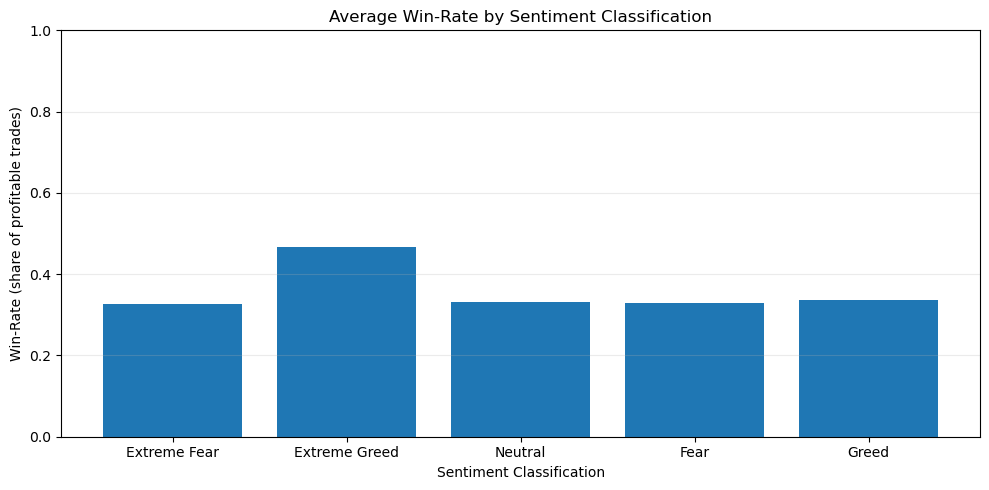

In [55]:
# Win-rate bar chart by class

wr = merged.groupby("classification")["win_rate"].mean().reindex(order)

plt.figure(figsize=(10, 5))
plt.bar(wr.index, wr.values)

plt.title("Average Win-Rate by Sentiment Classification")
plt.xlabel("Sentiment Classification")
plt.ylabel("Win-Rate (share of profitable trades)")
plt.ylim(0, 1)
plt.grid(True, axis="y", alpha=0.25)

plt.tight_layout()
plt.show()



### From this bar chart, the following insights can be derived : 
- Extreme Greed sentiment days have the highest win rate (~0.47 or 47% profitable trades).
- Extreme Fear sentiment days have the lowest win rate (~0.33 or 33% profitable trades), this indicates - when market sentiment is extremely negative, the strategy is less likely to generate profitable trades.
- Neutral, Fear, and Greed categories all have win rates around 0.33–0.34, showing minimal differences - thus, the strategy’s performance in these sentiment states is almost identical.
- Time trades based on sentiment, prioritizing Extreme Greed days might yield higher chances of profit (which is not gauranteed).

## ACTIONABLE INSIGHTS

In [58]:
# Direction & strength of linear relationship

# SIMPLE LINEAR TREND (SENTIMENT → NET_PNL) ----
# y = a * value + b

if merged["value"].nunique() > 1:
    a, b = np.polyfit(merged["value"], merged["net_pnl"], deg=1) # Fits a first-degree polynomial (straight line)
    
    print(f"\nLinear trend (net_pnl ≈ a*sentiment + b): a={a:.4f}, b={b:.4f}")
else:
    a = b = np.nan # If sentiment has only one unique value, slope and intercept are set to NaN (not available)
    
    print("\nSentiment value has no variance; skipping regression.")



if not np.isnan(a):
    direction = "positive" if a > 0 else "negative" # higher sentiment values tend to be associated with higher net PnL
    
    print(f"• Linear trend suggests a {direction} relationship between sentiment and net PnL "
          f"\n(slope={a:.4f}). \nInterpret as: every +1 point in sentiment associates with "
          f"~{a:.2f} change in daily net PnL (rough, not causal).")



Linear trend (net_pnl ≈ a*sentiment + b): a=-318.0957, b=40511.1232
• Linear trend suggests a negative relationship between sentiment and net PnL 
(slope=-318.0957). 
Interpret as: every +1 point in sentiment associates with ~-318.10 change in daily net PnL (rough, not causal).


In [59]:
# Correlations with net_pnl, win_rate, total_volume

def safe_corr(x, y):
    r = merged[[x, y]].corr().iloc[0, 1]
    return f"{r:.3f}"

print(f"• Correlation(value, net_pnl) = {safe_corr('value','net_pnl')} | "
      f"Correlation(value, win_rate) = {safe_corr('value','win_rate')} | "
      f"Correlation(value, total_volume) = {safe_corr('value','total_volume')}")



• Correlation(value, net_pnl) = -0.083 | Correlation(value, win_rate) = 0.152 | Correlation(value, total_volume) = -0.264


In [60]:
# Sentiment regimes look best/worst on average

best_class = by_class["mean_net_pnl"].idxmax() # returns the index label of "mean_net_pnl" column reaches its maximum value

worst_class = by_class["mean_net_pnl"].idxmin()

print(f"• Best average net PnL regime: {best_class} "
      f"({by_class.loc[best_class, 'mean_net_pnl']:.2f}). "
      f"Worst: {worst_class} ({by_class.loc[worst_class, 'mean_net_pnl']:.2f}).")



• Best average net PnL regime: Extreme Fear (52793.59). Worst: Greed (11140.57).


In [61]:
# Win-rate behavior

best_wr = by_class["mean_win_rate"].idxmax()

wr_pct = by_class.loc[best_wr, "mean_win_rate"] * 100

print(f"• Highest win-rate regime: {best_wr} ({wr_pct:.1f}%).")



• Highest win-rate regime: Extreme Greed (46.7%).


In [62]:
# Lead/Lag

print(f"• Lead-1: Today’s sentiment vs tomorrow net PnL corr = {lead_corr:.3f}. "
      f"Lag-1: Yesterday’s sentiment vs today net PnL corr = {lag_corr:.3f}.")



• Lead-1: Today’s sentiment vs tomorrow net PnL corr = -0.108. Lag-1: Yesterday’s sentiment vs today net PnL corr = -0.108.


In [63]:
# Risk/dispersion

# For each group in the Classification column -"Extreme Greed", "Fear", "Neutral". This calculates the standard deviation of "net_pnl"
# .reindex(order) - ensures the output follows a consistent sentiment sequence instead of alphabetical order.

disp = merged.groupby("classification")["net_pnl"].std().reindex(order) 

biggest_disp = disp.idxmax() #  returns the index label (classification name) with the highest standard deviation in net PnL.

print(f"• Highest dispersion of outcomes (risk) by regime: {biggest_disp} "
      f"(σ={disp.max():.2f}).")



• Highest dispersion of outcomes (risk) by regime: Extreme Fear (σ=101262.39).


In [64]:
# # 7) Extreme regimes difference test

# Compare Extreme Fear vs Extreme Greed (if present)

def subset_class(df, name):
    return df[df["classification"].str.upper() == name.upper()]

ef = subset_class(merged, "Extreme Fear")
eg = subset_class(merged, "Extreme Greed")

if len(ef) > 1 and len(eg) > 1:
    # T-test on daily net PnL distributions (unequal var by default)
    tstat, pval = stats.ttest_ind(ef["net_pnl"], eg["net_pnl"], equal_var=False, nan_policy="omit")
    print(f"\nT-test (net_pnl): Extreme Fear vs Extreme Greed : t={tstat:.3f}, p={pval:.4f}")
else:
    print("\nNot enough Extreme Fear/Extreme Greed days for a t-test.")


if len(ef) > 1 and len(eg) > 1:
    more_profitable = "Extreme Greed" if eg["net_pnl"].mean() > ef["net_pnl"].mean() else "Extreme Fear"
    print(f"• Extreme regimes: average net PnL – "
          f"\nExtreme Fear={ef['net_pnl'].mean():.2f}, Extreme Greed={eg['net_pnl'].mean():.2f}. "
          f"\nT-test p-value={pval:.4f}. "
          f"\n{'Difference is likely meaningful' if pval < 0.05 else 'Difference is not statistically significant'}. "
          f"\nMore profitable on average: {more_profitable}.")
else:
    print("\n• Not enough Extreme Fear/Greed days to compare robustly.")





T-test (net_pnl): Extreme Fear vs Extreme Greed : t=1.038, p=0.3160
• Extreme regimes: average net PnL – 
Extreme Fear=52793.59, Extreme Greed=23817.29. 
T-test p-value=0.3160. 
Difference is not statistically significant. 
More profitable on average: Extreme Fear.


## <u> <center> Conclusion : 

### <u>Overall Observations on patterns :  
- <b>Regime changes alter risk, not average edge:</b> Extreme sentiment days amplify variance (big wins/losses). The edge (mean PnL) is not linearly tied to sentiment score, but the risk profile clearly is.

- <b>Quality over quantity:</b> More trades and higher volume don’t improve win-rate; they inflate fees. Filtering out low-conviction trades matters more than “trading more” in any sentiment state.

- <b>Extreme Greed is friendlier for timing, but risky:</b> Getting a higher win-rate in Extreme Greed, yet fat tails persist. Tighten controls on losers; No gaurantee on higher hit-rate with guaranteed profit.

### <u>Operational Takeaways
- <b>Regime-aware sizing & risk:</b>
     - Use smaller base size / wider stops in Extreme Fear & Extreme Greed (higher volatility).
     - Increase selectivity in Extreme Fear; avoid revenge trading and cap daily loss.

- <b>Fee discipline:</b>
     - Set max daily trades or fee-to-PnL guardrails (e.g., halt if fees exceed X% of gross PnL).
     - Remove setups with negative PnL after typical fees in backtests.

- <b>Signal engineering (beyond raw sentiment) <instead of values from 1 to 100 for regime dummies></b> :
    - Replace raw score with regime dummies (EFear/Fear/Neutral/Greed/EGreed).
    - <b>Add interaction terms:</b> regime × (volatility, range, trend, volume imbalance).
    - Use non-linear models (tree boosters) to capture threshold effects.

- <b>Event/context overlay:</b>
    - Tag outlier days (macro news, ETF flows, liquidations).
    - Many volume/PnL spikes are event-driven, not sentiment-driven.

- <b>Execution filters:</b>
    - Require market structure confirmation (trend, breakout, ATR filters) before taking a setup in any regime.
    - In Extreme Greed, allow trades that follow trend continuation; in Extreme Fear, prefer mean-reversion only with strong confirmation.

